# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Obehi | Edeoghon | Obehi Edeoghon, 2024-10-07 | 3 | 25 |
| Member 2: | Tirth | Panchal | Tirth Panchal, 2024-10-08 | 3 | 25 |
| Member 3: | Parth | Bhamani | Parth Bhamani, 2024-10-09 | 3 | 25 |
| Member 4: | Kandarp | Rathod | Kandarp Rathod | 3 | 25 |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

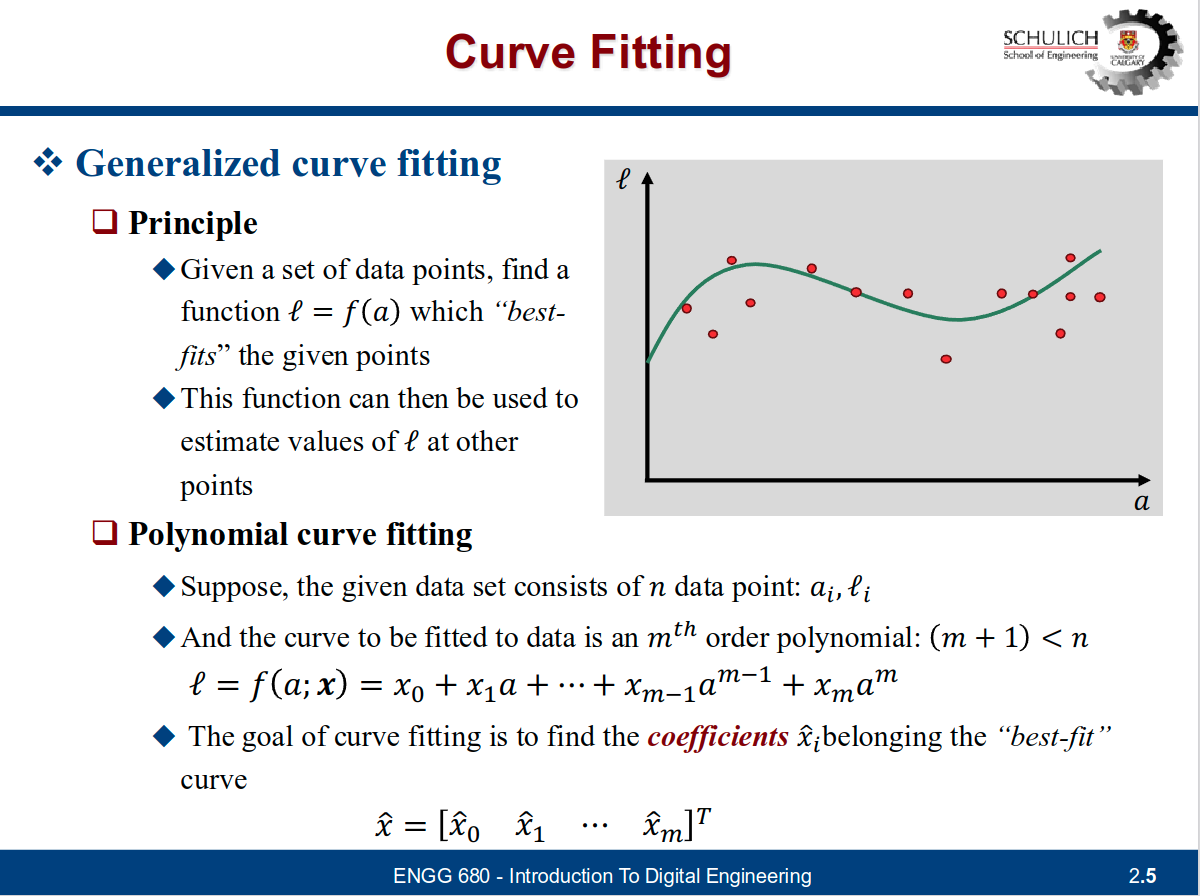

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [29]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)

from google.colab import drive
drive.mount ('/content/drive')

df_data = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0]
l_var = arr_data[:,1]
l_true = arr_data[:,2]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye (n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


<function matplotlib.pyplot.show(close=None, block=None)>

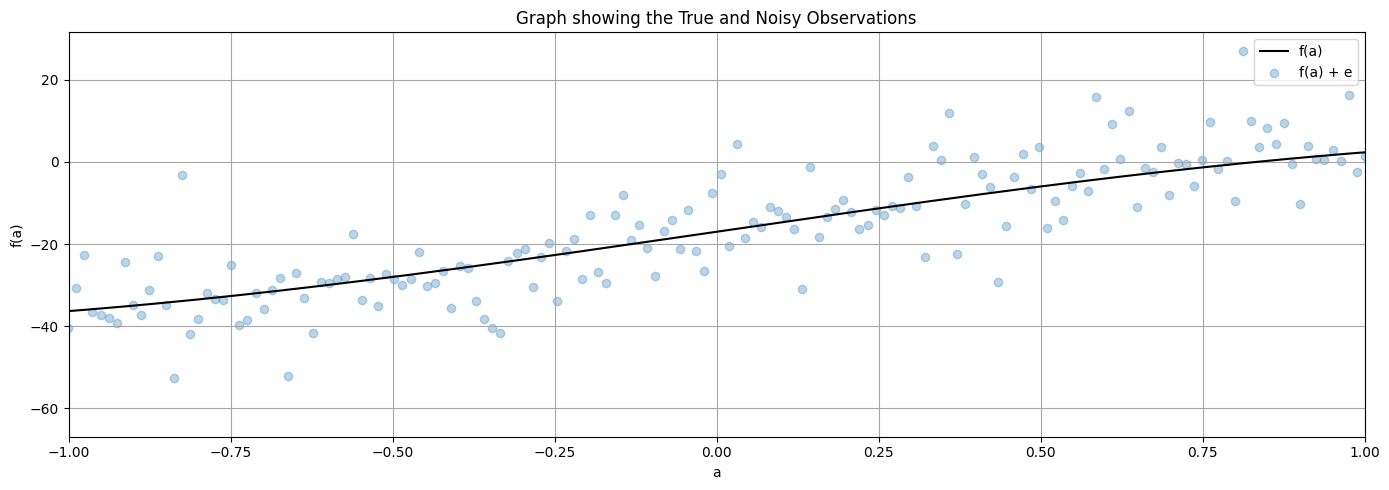

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

ax.plot(a, l_true, label='f(a)', color='k')
ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)

ax.set_xlabel('a')
ax.set_ylabel('f(a)')
ax.set_title('Graph showing the True and Noisy Observations')
ax.legend()
ax.set_xlim(-1, 1)

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()
plt.show

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    A =np.vander(a, deg+1) #Creating Vandermonde Matrix

    # Applying weights to the matrix system
    A_w = np.dot(np.linalg.inv(P), A)
    l_w = np.dot(np.linalg.inv(P), l)

    # Solving for polynomial coefficients using the Least Square Method
    x, residuals, rank, s = np.linalg.lstsq(A_w, l_w, rcond=None)

    # Covariance matrix of the estimates
    cov_x = np.linalg.inv(A.T @ np.linalg.inv(P) @ A)

    # Posterior variance factor (goodness of fit)
    v = A @ x - l  # Observation residuals
    apv = (v.T @ np.linalg.inv(P) @ v) / (n - deg - 1)


    return (x, cov_x, apv, v)

In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

x_line, cov_line, apv_line, v_line = fit_polynomial_curve(a, l, P, 1)
x_cubic, cov_cubic, apv_cubic, v_cubic = fit_polynomial_curve(a, l, P, 3)
x_quintic, cov_quintic, apv_quintic, v_quintic = fit_polynomial_curve(a, l, P, 5)


In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(x_line, a)
cubic_uw = np.polyval(x_cubic, a)
quintic_uw = np.polyval(x_quintic, a)

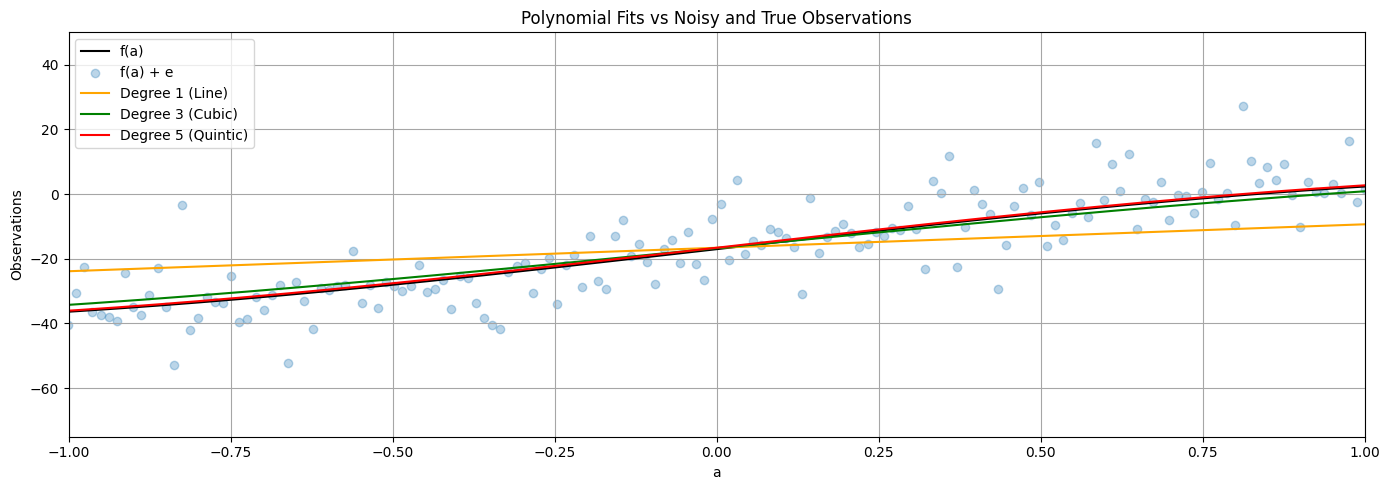

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(a, l_true, label="f(a)", color='k')

ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

ax.plot(a, line_uw, label="Degree 1 (Line)", color='orange')
ax.plot(a, cubic_uw, label="Degree 3 (Cubic)", color='green')
ax.plot(a, quintic_uw, label="Degree 5 (Quintic)", color='red')

ax.set_xlim([-1, 1])
ax.set_ylim([-75,50])
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('Polynomial Fits vs Noisy and True Observations')
ax.legend()



ax.grid(True, which='both', ls='-', color='0.65')
fig.tight_layout()
plt.show()



In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
# ...
print(f"A posterior variance factor (Degree 1): {apv_line}")
print(f"A posterior variance factor (Degree 3): {apv_cubic}")
print(f"A posterior variance factor (Degree 5): {apv_quintic}")


A posterior variance factor (Degree 1): 162.742608604322
A posterior variance factor (Degree 3): 66.13227783131883
A posterior variance factor (Degree 5): 63.7583446301842


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# ...
norm_line = np.linalg.norm(l_true - line_uw)
norm_cubic = np.linalg.norm(l_true - cubic_uw)
norm_quintic = np.linalg.norm(l_true - quintic_uw)

print(f"Norm between the predicted observations (Degree 1): {norm_line}")
print(f"Norm between the predicted observations (Degree 3): {norm_cubic}")
print(f"Norm between the predicted observations (Degree 5): {norm_quintic}")


Norm between the predicted observations (Degree 1): 229.0601679674409
Norm between the predicted observations (Degree 3): 38.28597992911217
Norm between the predicted observations (Degree 5): 17.369967196965252


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# ...



In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)


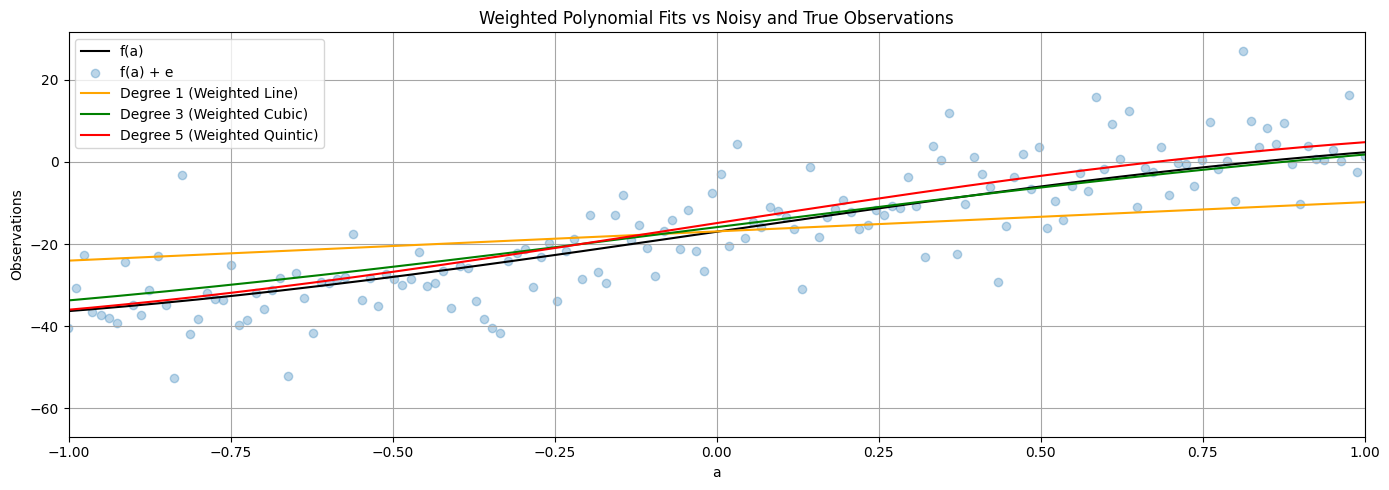

A posterior variance factor (Weighted Degree 1): 14437.250326238798
A posterior variance factor (Weighted Degree 3): 7810.30927628589
A posterior variance factor (Weighted Degree 5): 7575.389069566157
Norm (Weighted Degree 1): 228.6586557562635
Norm (Weighted Degree 3): 45.894473738353454
Norm (Weighted Degree 5): 39.97336451276717


In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...

# Fit polynomials of degree 1, 3, and 5 using weighted P matrix
x_line_w, cov_line_w, apv_line_w, v_line_w = fit_polynomial_curve(a, l, P, 1)
x_cubic_w, cov_cubic_w, apv_cubic_w, v_cubic_w = fit_polynomial_curve(a, l, P, 3)
x_quintic_w, cov_quintic_w, apv_quintic_w, v_quintic_w = fit_polynomial_curve(a, l, P, 5)

# Construct polynomial functions for the weighted fit
line_w = np.polyval(x_line_w, a)
cubic_w = np.polyval(x_cubic_w, a)
quintic_w = np.polyval(x_quintic_w, a)

# Plot the polynomial fits for weighted LSE
fig, ax = plt.subplots(figsize=(14, 5))

# Plot true observations
ax.plot(a, l_true, label="f(a)", color='k')

# Plot noisy observations
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Plot weighted polynomial fits
ax.plot(a, line_w, label="Degree 1 (Weighted Line)", color='orange')
ax.plot(a, cubic_w, label="Degree 3 (Weighted Cubic)", color='green')
ax.plot(a, quintic_w, label="Degree 5 (Weighted Quintic)", color='red')

# Add labels, legend, and title
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('Weighted Polynomial Fits vs Noisy and True Observations')
ax.legend()

# Set x-axis limits
ax.set_xlim([-1, 1])

# Add grid
ax.grid(True, which='both', ls='-', color='0.65')
fig.tight_layout()
plt.show()

# Print the a posterior variance factor for weighted LSE
print(f"A posterior variance factor (Weighted Degree 1): {apv_line_w}")
print(f"A posterior variance factor (Weighted Degree 3): {apv_cubic_w}")
print(f"A posterior variance factor (Weighted Degree 5): {apv_quintic_w}")

# Compute and print the norm between predicted and true observations (weighted LSE)
norm_line_w = np.linalg.norm(line_w - l_true)
norm_cubic_w = np.linalg.norm(cubic_w - l_true)
norm_quintic_w = np.linalg.norm(quintic_w - l_true)

print(f"Norm (Weighted Degree 1): {norm_line_w}")
print(f"Norm (Weighted Degree 3): {norm_cubic_w}")
print(f"Norm (Weighted Degree 5): {norm_quintic_w}")



In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...
# By considering the variance of your data, Weighted Least Squares Estimation (LSE) is a more intelligent method that can better manage noise and mistakes. By giving greater weight to dependable observations and less weight to noisy ones, it produces a more accurate fit to the actual data. Because weighted LSE focusses on the quality of data points, it performs better than the unweighted variant, as seen by the decreased posterior variance factor and norm. By reducing the influence of ambiguous data, it essentially produces an estimator that is more accurate and efficient overall.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

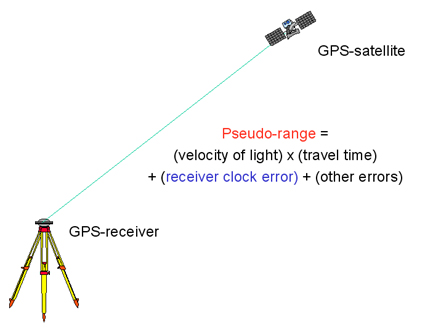

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()


In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = 4

In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.identity(n)

In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  receiver_pos_expanded = receiver_pos[np.newaxis, :]
  diff = satellite_pos[:, :3] - receiver_pos_expanded
  distances = np.sqrt(np.sum(diff**2, axis=1))

  return distances


In [ ]:
  # step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
    n= s_pos.shape[0] # Indent this line
    A = np.zeros((n, 4))
    c= 299792458
    for i in range(n):
        A[i, 0] = (s_pos[i, 0] - r_pos[0]) / rho[i]
        A[i, 1] = (s_pos[i, 1] - r_pos[1]) / rho[i]
        A[i, 2] = (s_pos[i, 2] - r_pos[2]) / rho[i]
        A[i, 3] = -c
    return A # Indent this line to be within the function

In [28]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

pseudorange_measurements = pseudorange[:, 0]

while np.max(np.abs(delta[:3])) >=0.001:

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos)

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat, sat_pos, rho)

       # compute the misclosure array w
       # (1 marks)
       w = pseudorange_measurements - rho

       # compute the corrections delta
       # (1 marks)
       delta = np.linalg.lstsq(A, w,rcond=None)[0]

       # update the states
       # (1 marks)
       x_hat +=delta


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = x_hat[:3] - GroundTruth


       # update the counter i, (i.e., increament of 1 for each iteration)
       i += 1


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = np.var(w)

# compute the Covariance matrix of estimated states
# (1 marks)
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

# Assuming 'pseudorange_data' is a numpy array containing the measurements
# If it's from a file, you'd need to load it first, e.g., using np.loadtxt()
# Replace 'path/to/your/file.txt' with the actual file path
# pseudorange_measurements = np.loadtxt('path/to/your/file.txt')

# For demonstration purposes, let's create a dummy pseudorange_measurements array
# Make sure to replace this with your actual data
pseudorange_measurements = rho + np.random.normal(0, 5, size=rho.shape) # Adding some random noise for simulation

while np.max(np.abs(delta[:3])) >=0.001:

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos)

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat, sat_pos, rho)

       # compute the misclosure array w
       # (1 marks)
       w = pseudorange_measurements -rho

       # compute the corrections delta
       # (1 marks)
       delta = np.linalg.lstsq(A, w,rcond=None)[0] # Corrected to lstsq

       # update the states
       # (1 marks)
       x_hat +=delta


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = x_hat[:3] - GroundTruth


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = np.var(w)

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * np.linalg.pinv(A.T @ A)


KeyboardInterrupt: 

In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)
print("Estimated States:", x_hat)
print("Corrections:", delta)
print("Estimated Measurements Residuals:", w)
print("A Posteriori Variance of Unit Weight:", apv)
print("Covariance Matrix of Estimated States:\n", C_x_hat)
print("Number of Iterations:", i)
print("3-D Position Errors:", err_pos)


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
print("The A Posteriori Variance of Unit Weight and the Covariance Matrix of the Estimated States are key indicators of a model’s performance. When the A Posteriori Variance of Unit Weight is close to 1, it shows that the model fits the observations well, indicating consistency. Meanwhile, the Covariance Matrix reveals the uncertainty in the estimated parameters like position and clock bias. Lower values in this matrix mean we can be more confident in these estimates, reflecting greater precision. Together, these metrics give a clear picture of how accurate and reliable the model is, balancing fit with confidence in the predictions")

In [31]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.
plt.figure(figsize=(12, 8))
# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.subplot(3, 1, 1)
plt.plot(arr_i, np.log(np.abs(arr_w)), label='Log of Misclosure', color='orange')
plt.title('Log of Misclosure vs. LSQ Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log of Misclosure')
plt.grid(True)
plt.legend()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.subplot(3, 1, 2)
plt.plot(arr_i, np.log(np.abs(arr_delta)), label='Log of Corrections', color='green')
plt.title('Log of Corrections vs. LSQ Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log of Corrections')
plt.grid(True)
plt.legend()
# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.subplot(3, 1, 3)
plt.plot(arr_i, np.long(np.abs(arr_err_pos)), label='Log of Position Errors', color='blue')
plt.title('Log of 3D position error vs LSQ interaction number')
plt.xlabel('Iteration Number')
plt.ylabel('Log of 3D position errors')
plt.grid(True)
plt.legend()

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

<ipython-input-31-86eed2ee4945>:26: FutureWarning: In the future `np.long` will be defined as the corresponding NumPy scalar.
  plt.plot(arr_i, np.long(np.abs(arr_err_pos)), label='Log of Position Errors', color='blue')


AttributeError: module 'numpy' has no attribute 'long'

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


Error in callback <function _draw_all_if_interactive at 0x7fbc70ab4ee0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fbc70ab4160> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.
plt.figure(figsize=(15, 10))
# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.subplot(3, 1, 1)
plt.plot(arr_i, np.log(np.abs(arr_w)), label='Log of Misclosure', color='orange')
plt.title('Log of Misclosure vs. LSQ Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log of Misclosure')
plt.grid(True)
plt.legend()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.subplot(3, 1, 2)
plt.plot(arr_i, np.log(np.abs(arr_delta)), label='Log of Corrections', color='green')
plt.title('Log of Corrections vs. LSQ Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log of Corrections')
plt.grid(True)
plt.legend()
# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.subplot(3, 1, 3)
# Changed np.long to np.log to calculate the logarithm of the position errors
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='Log of Position Errors', color='blue')
plt.title('Log of 3D position error vs LSQ interaction number')
plt.xlabel('Iteration Number')
plt.ylabel('Log of 3D position errors')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
